In [ ]:
MUHAMMAD FAIZ BIN DENI 52213122069 L01-B04
MOHAMMAD ADIB BIN ROSLAN 52213122347 L01-B04

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random as r
import os
import shutil
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications import MobileNetV3Small

In [9]:
# Centering all the output images in the notebook.
from IPython.core.display import HTML
HTML("""
 <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [10]:
class Dataset:
    def __init__(self, dataset_path: str):
        self.PARENT = dataset_path
        self.class_distribution = dict()
    
    def __compute_class_distributions(self):
        for dirname in os.listdir(self.PARENT):
            self.class_distribution[dirname] = len(os.listdir(os.path.join(self.PARENT, dirname)))

    def class_distributions(self):
        self.__compute_class_distributions()

        plt.figure(figsize=(10,10))
        plt.bar(self.class_distribution.keys(),
                self.class_distribution.values(),
                color=["crimson","red","orange","yellow"])
        plt.xticks(rotation=90)
        plt.title("Class Distribution of Plant Seedlings dataset")
        plt.xlabel("Class Label")
        plt.ylabel("Frequency of class")
        plt.show()

    def show_class_samples(self):
        rows = 4
        columns = 3
        c = 0
        fig, axs = plt.subplots(rows, columns, figsize=(15,15))
        for dirname in os.listdir(self.PARENT):
            img_path = r.choice(os.listdir(os.path.join(self.PARENT, dirname)))
            image = mpimg.imread(os.path.join(self.PARENT, dirname, img_path))
            axs[c//columns, c%columns].imshow(image)
            axs[c//columns, c%columns].set_title(dirname)
            c += 1
        fig.suptitle("Image Samples of Plant Seedlings dataset")
        plt.subplots_adjust(bottom=0.1, top=0.9, hspace=0.5)
        plt.show()

In [11]:
plant_village = Dataset(r"C:\nonsegmentedv2")

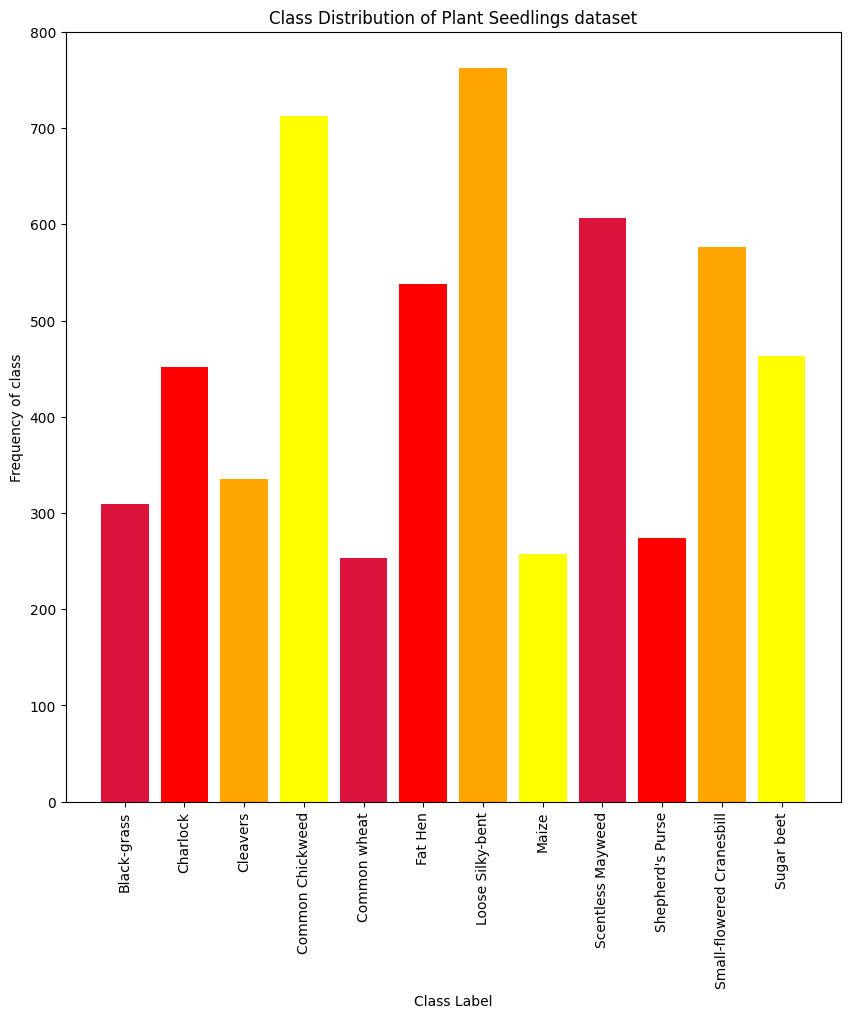

In [12]:
plant_village.class_distributions()

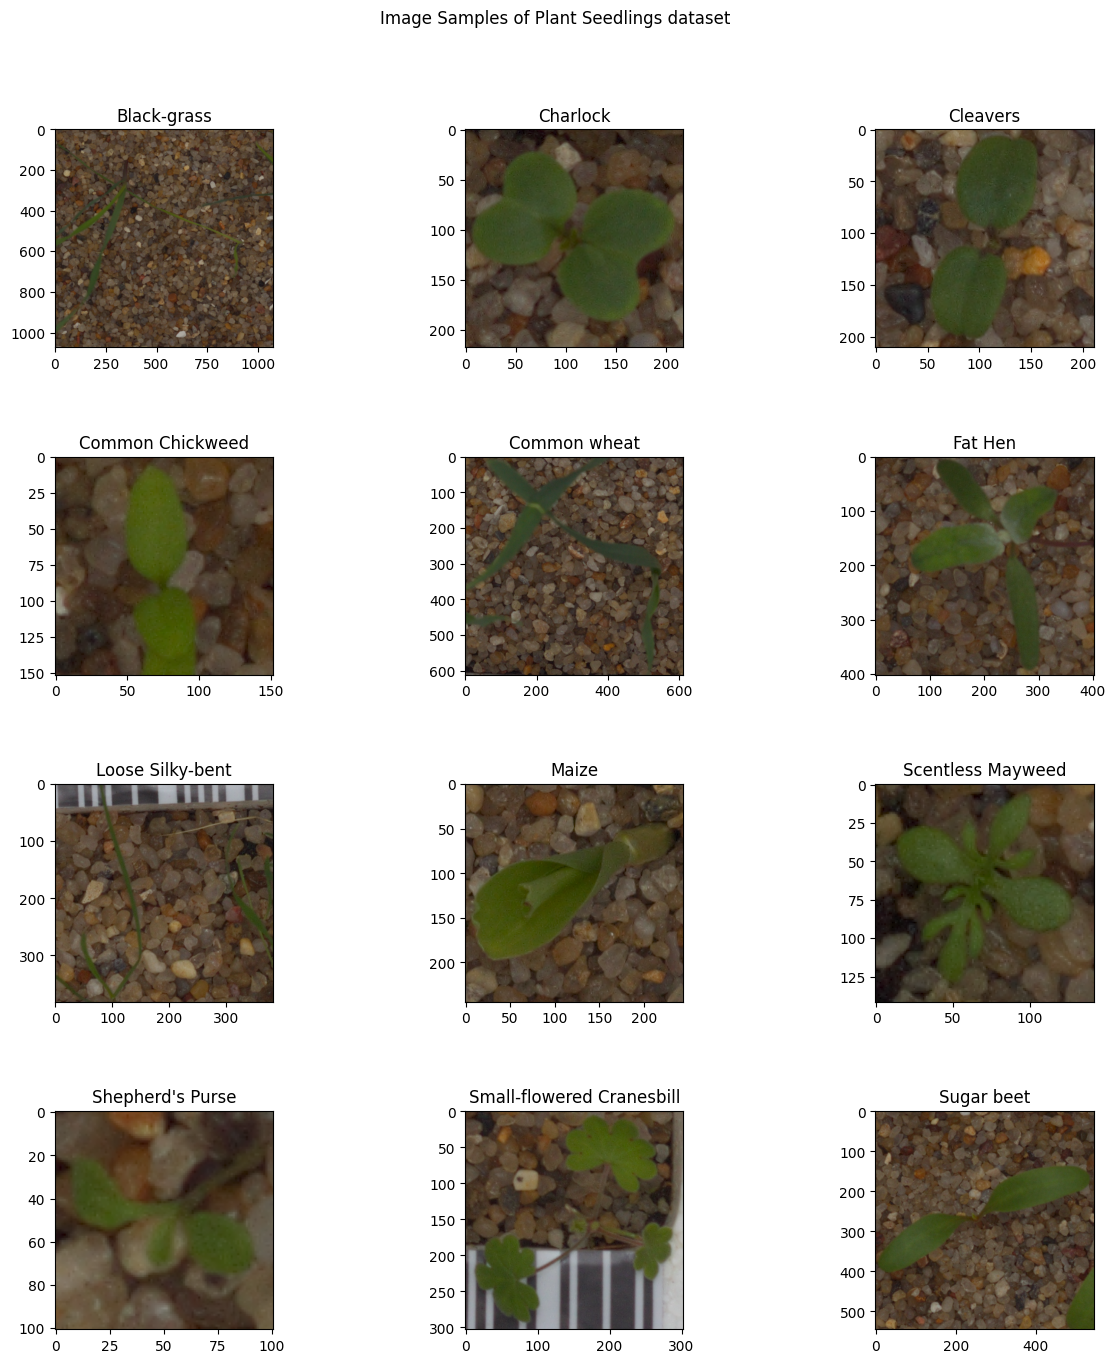

In [13]:
plant_village.show_class_samples()

In [14]:
class DataSplit:
    def __init__(self, dataset_path: str, train_path: str, test_path: str, val_path: str, val_split=0.2, test_split=0.1) -> None:
        self.PARENT = dataset_path
        self.TRAIN_DIR = train_path
        self.TEST_DIR = test_path
        self.VAL_DIR = val_path
        self.train_gen = None
        self.test_gen = None
        self.val_gen = None
        self.val_split = val_split
        self.test_split = test_split
        self.setup()

    def setup(self):
        # Create directories if they don't exist
        for path in [self.TRAIN_DIR, self.TEST_DIR, self.VAL_DIR]:
            if not os.path.exists(path):
                os.makedirs(path)
        
        # Split the data
        self.split_data()

    def split_data(self):
        # Get all images from the parent directory
        all_images = []
        for root, dirs, files in os.walk(self.PARENT):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):
                    all_images.append(os.path.join(root, file))
        
        # Shuffle and split the data
        train_val_images, test_images = train_test_split(all_images, test_size=self.test_split, random_state=42)
        train_images, val_images = train_test_split(train_val_images, test_size=self.val_split / (1 - self.test_split), random_state=42)
        
        # Move images to respective directories
        self.move_images(train_images, self.TRAIN_DIR)
        self.move_images(val_images, self.VAL_DIR)
        self.move_images(test_images, self.TEST_DIR)

    def move_images(self, images, target_dir):
        for image in images:
            target_subdir = os.path.join(target_dir, os.path.basename(os.path.dirname(image)))
            if not os.path.exists(target_subdir):
                os.makedirs(target_subdir)
            shutil.copy(image, target_subdir)

    def create_generators(self):
        self.train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
        )

        self.test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input
        )

        self.val_gen =  tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input
        )

    def get_images(self):
        train_images = self.train_gen.flow_from_directory(
            directory=self.TRAIN_DIR,
            target_size=(75, 75),
            color_mode='rgb',
            class_mode='categorical',
            batch_size=32,
            shuffle=True,
            seed=42
        )

        val_images = self.val_gen.flow_from_directory(
            directory=self.VAL_DIR,
            target_size=(75, 75),
            color_mode='rgb',
            class_mode='categorical',
            batch_size=32,
            shuffle=True,
            seed=42
        )

        test_images = self.test_gen.flow_from_directory(
            directory=self.TEST_DIR,
            target_size=(75, 75),
            color_mode='rgb',
            class_mode='categorical',
            batch_size=32,
            shuffle=False,
            seed=42
        )

        return train_images, val_images, test_images

# Example usage
ds = DataSplit(r"C:\nonsegmentedv2", 
               r"C:\nonsegmentedv2\train_val_test\train", 
               r"C:\nonsegmentedv2\train_val_test\test", 
               r"C:\nonsegmentedv2\train_val_test\val")

In [15]:
train = Dataset(r"C:\nonsegmentedv2\train_val_test\train")

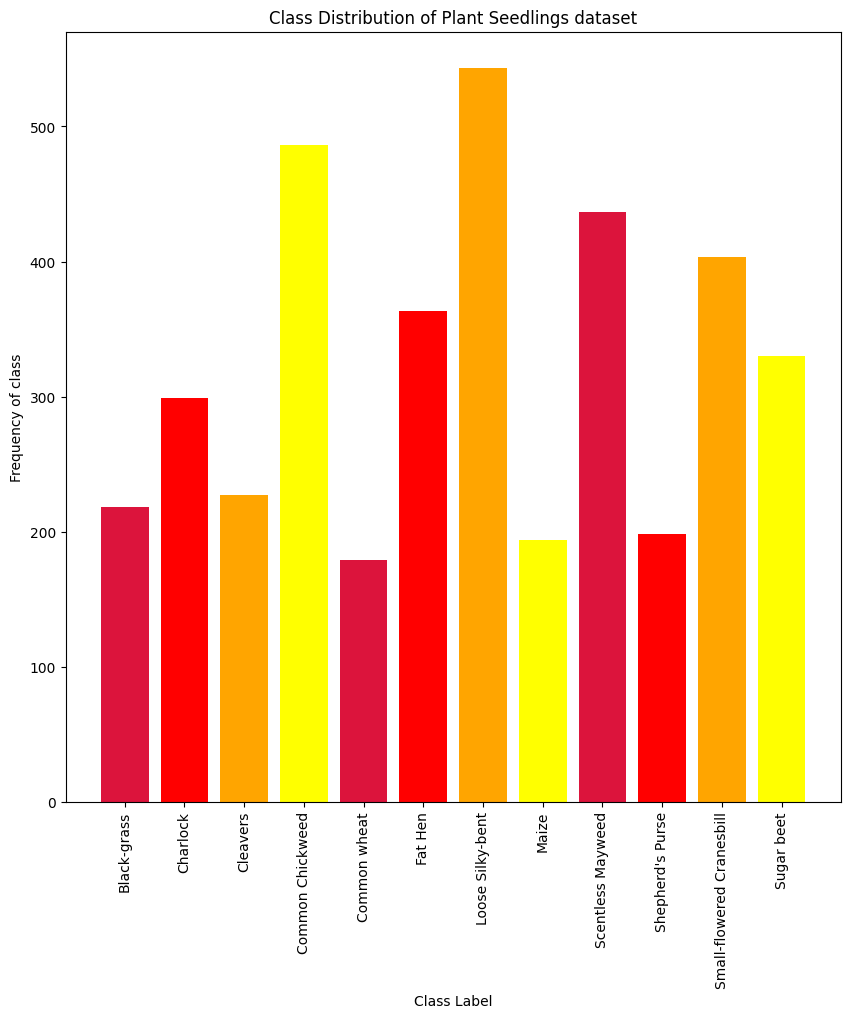

In [16]:
train.class_distributions()

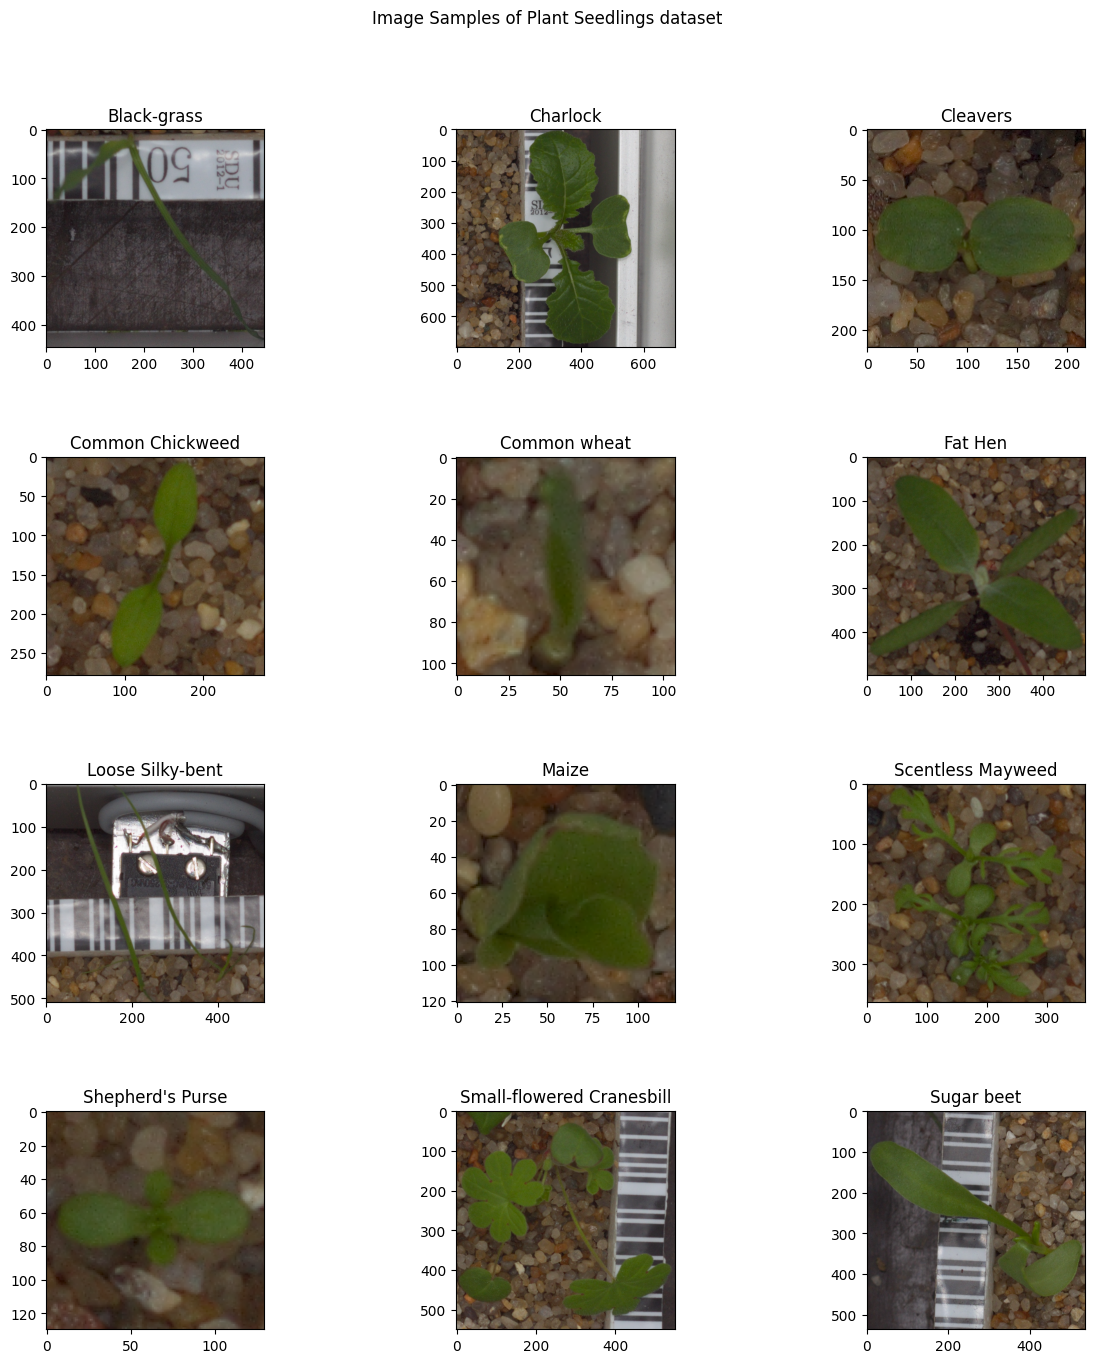

In [17]:
train.show_class_samples()

In [18]:
test = Dataset(r"C:\nonsegmentedv2\train_val_test\test")

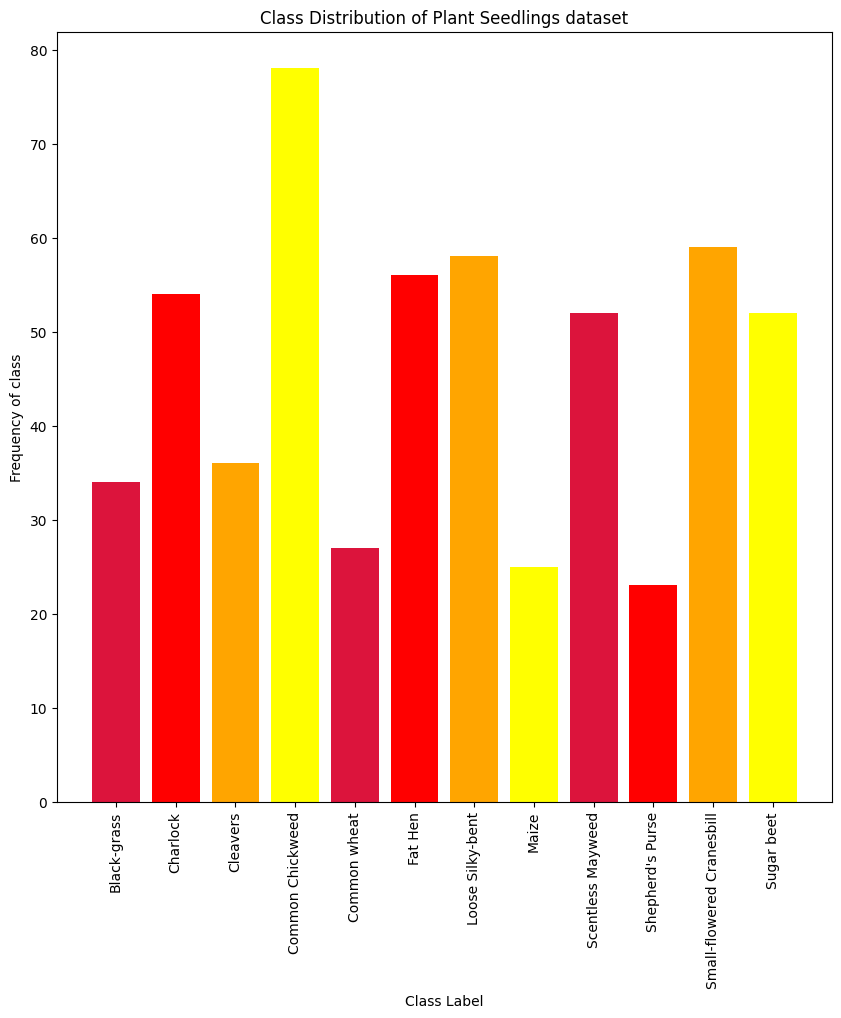

In [19]:
test.class_distributions()

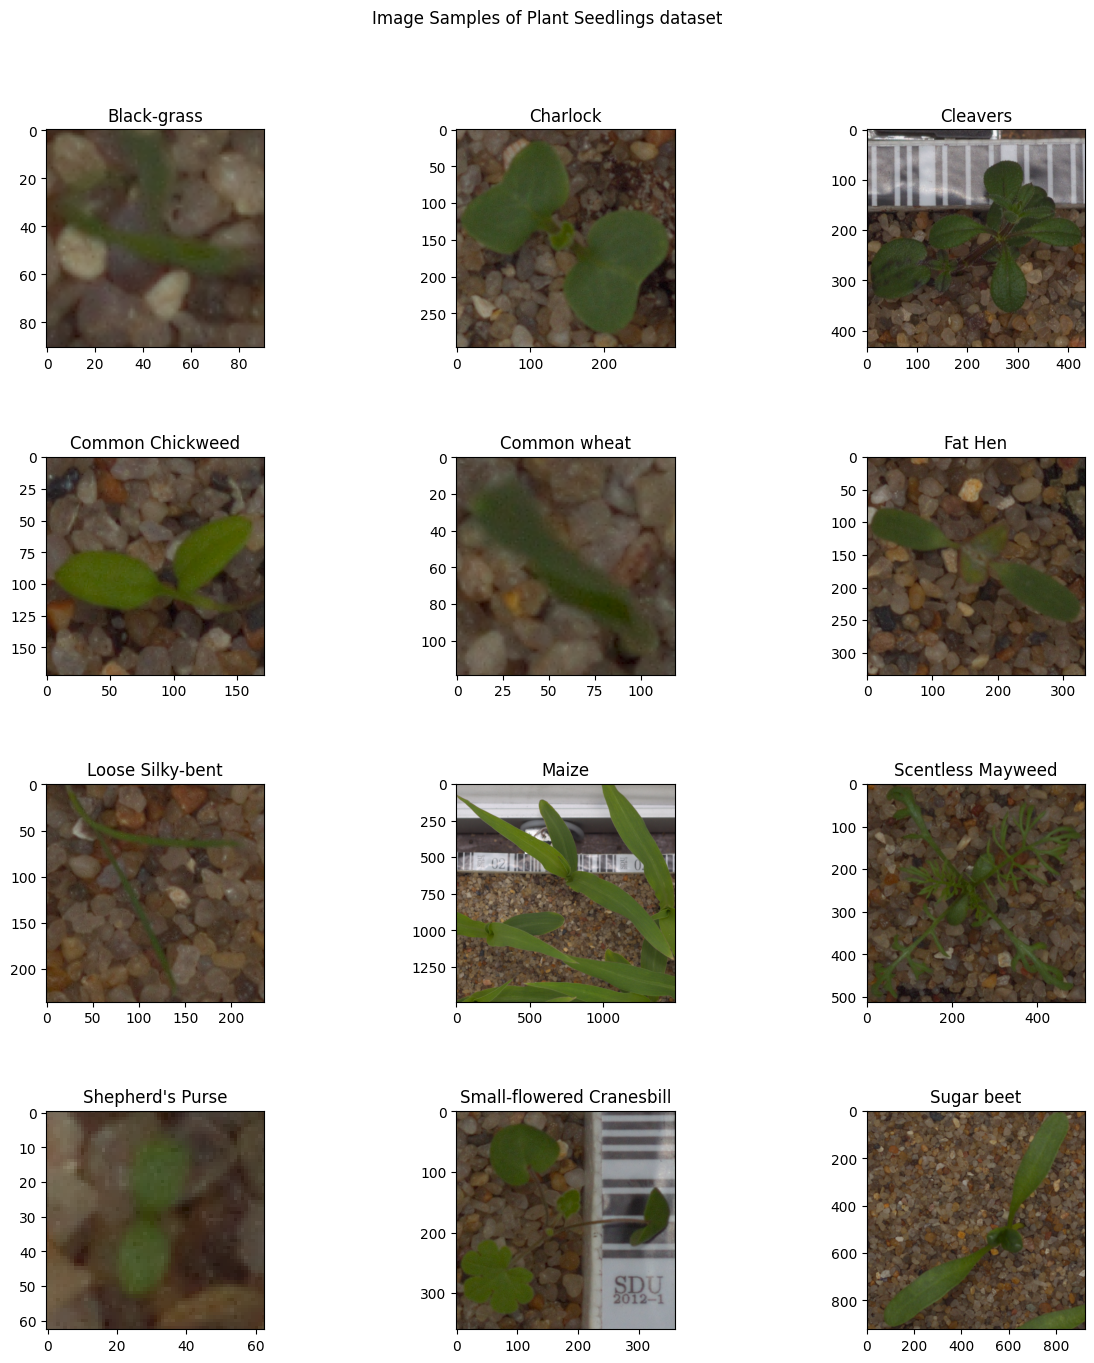

In [20]:
test.show_class_samples()

In [21]:
val = Dataset(r"C:\nonsegmentedv2\train_val_test\val")

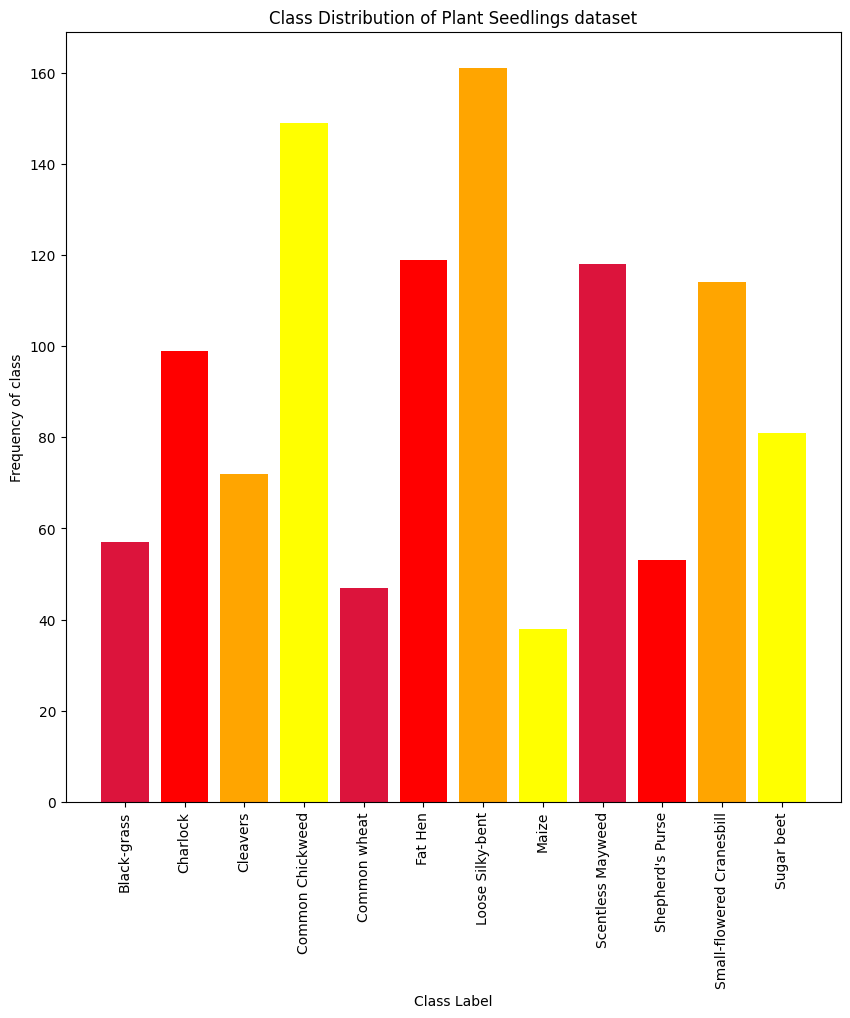

In [22]:
val.class_distributions()

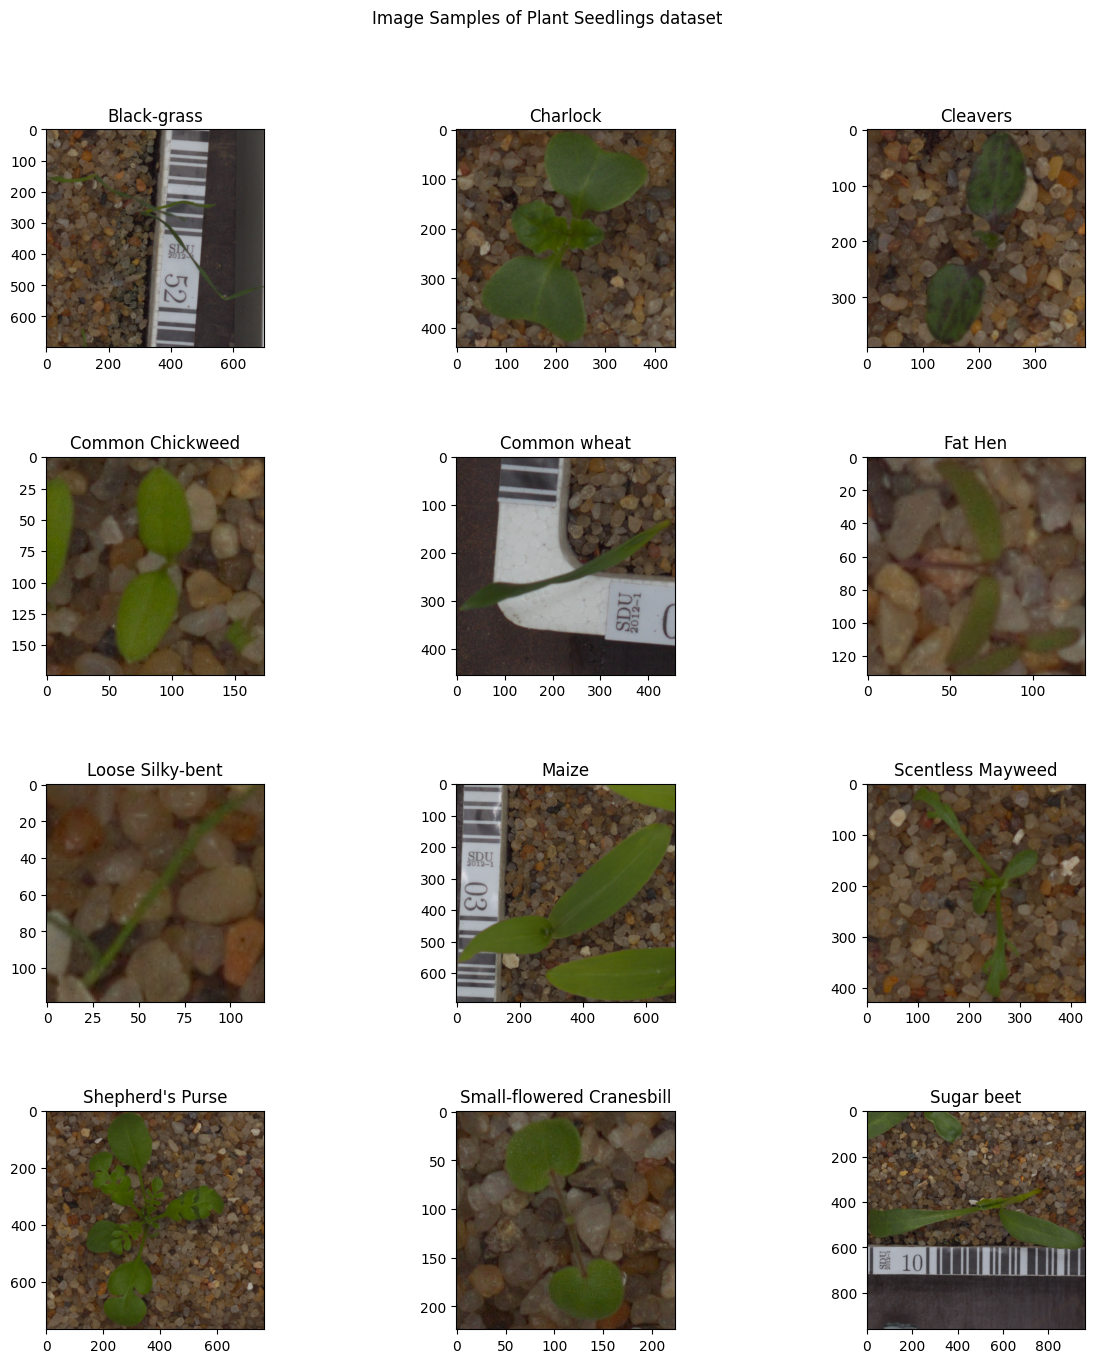

In [23]:
val.show_class_samples()

In [24]:
ds.create_generators()

In [25]:
train, val, test = ds.get_images()

Found 3877 images belonging to 12 classes.
Found 1108 images belonging to 12 classes.
Found 554 images belonging to 12 classes.


In [26]:
class TransferLearning:
        
    def __init__(self, train, val):
        self.train = train
        self.val = val
        self.model = None
        self.history = None
        self.training_time = None

    def load_model(self, model_name='ResNet50'):
        if model_name == 'ResNet50':
            self.model = ResNet50(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        elif model_name == 'DenseNet121':
            self.model = DenseNet121(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        elif model_name == 'MobileNetV3Small':
            self.model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        else:
            raise ValueError("Unsupported model. Choose from 'ResNet50', 'DenseNet121', 'MobileNetV3Small'.")
    
    def mark_layers_non_trainable(self):
        for layer in self.model.layers:
            layer.trainable = False
    
    def add_final_layer(self):
        x = GlobalAveragePooling2D()(self.model.output)
        x = Dense(1000, activation='relu')(x)
        predictions = Dense(12, activation='softmax')(x)
        self.model = Model(inputs=self.model.input, outputs=predictions)

    def compile_model(self):
        self.model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
    
    def train_model(self, epochs=50, batch_size=32):
        start_time = time.time()
        self.history = self.model.fit(self.train,
                                      batch_size=batch_size, 
                                      epochs=epochs,
                                      validation_data=self.val)
        end_time = time.time()
        self.training_time = end_time - start_time
        print(f"Training time: {self.training_time} seconds")

    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].set_title('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train', 'Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].set_title('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])

In [27]:
tl = TransferLearning(train=train, val=val)

In [28]:
tl.load_model('DenseNet121')  # Choose 'ResNet50', 'DenseNet121', or 'MobileNetV3Small'

In [29]:
tl.mark_layers_non_trainable()

In [30]:
tl.add_final_layer()

In [31]:
tl.compile_model()

In [32]:
tl.train_model()

Epoch 1/50
122/122 [==============================] - 93s 717ms/step - loss: 2.8349 - accuracy: 0.3771 - val_loss: 1.6661 - val_accuracy: 0.4801
Epoch 2/50
122/122 [==============================] - 56s 460ms/step - loss: 1.3104 - accuracy: 0.5654 - val_loss: 1.4307 - val_accuracy: 0.5686
Epoch 3/50
122/122 [==============================] - 55s 451ms/step - loss: 1.1221 - accuracy: 0.6263 - val_loss: 1.4054 - val_accuracy: 0.5505
Epoch 4/50
122/122 [==============================] - 51s 421ms/step - loss: 0.9476 - accuracy: 0.6747 - val_loss: 1.5293 - val_accuracy: 0.5415
Epoch 5/50
122/122 [==============================] - 49s 402ms/step - loss: 0.9010 - accuracy: 0.6938 - val_loss: 1.4027 - val_accuracy: 0.5397
Epoch 6/50
122/122 [==============================] - 51s 417ms/step - loss: 0.8257 - accuracy: 0.7132 - val_loss: 1.3752 - val_accuracy: 0.5812
Epoch 7/50
122/122 [==============================] - 51s 421ms/step - loss: 0.7076 - accuracy: 0.7526 - val_loss: 1.2882 - val_ac

In [33]:
# Save the trained model
tl.model.save("models/first_model.h5")

C:\Users\User\anaconda3\envs\ISB46703\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# Get class names
CLASS_NAMES = list(train.class_indices.keys())

In [35]:
# Generate predictions
predictions = tl.model.predict(test)
predictions = np.argmax(predictions, axis=1)
test_labels = test.classes

18/18 [==============================] - 13s 574ms/step


In [36]:
# Evaluate accuracy
acc = accuracy_score(test_labels, predictions)
print(f"Test Accuracy: {acc * 100:.3f}%")


Test Accuracy: 61.552%


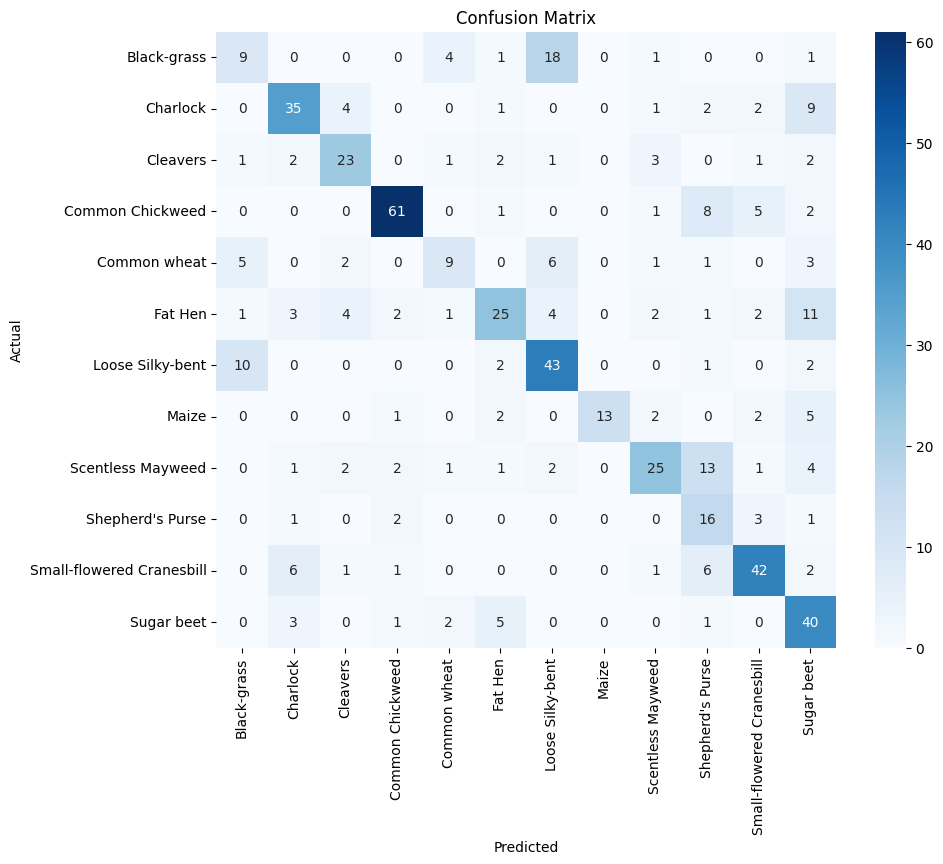

In [37]:
cm = tf.math.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
# Classification report
clr = classification_report(test_labels, predictions, target_names=CLASS_NAMES)
print(clr)


                           precision    recall  f1-score   support

              Black-grass       0.35      0.26      0.30        34
                 Charlock       0.69      0.65      0.67        54
                 Cleavers       0.64      0.64      0.64        36
         Common Chickweed       0.87      0.78      0.82        78
             Common wheat       0.50      0.33      0.40        27
                  Fat Hen       0.62      0.45      0.52        56
         Loose Silky-bent       0.58      0.74      0.65        58
                    Maize       1.00      0.52      0.68        25
        Scentless Mayweed       0.68      0.48      0.56        52
         Shepherd's Purse       0.33      0.70      0.44        23
Small-flowered Cranesbill       0.72      0.71      0.72        59
               Sugar beet       0.49      0.77      0.60        52

                 accuracy                           0.62       554
                macro avg       0.62      0.59      0.58    

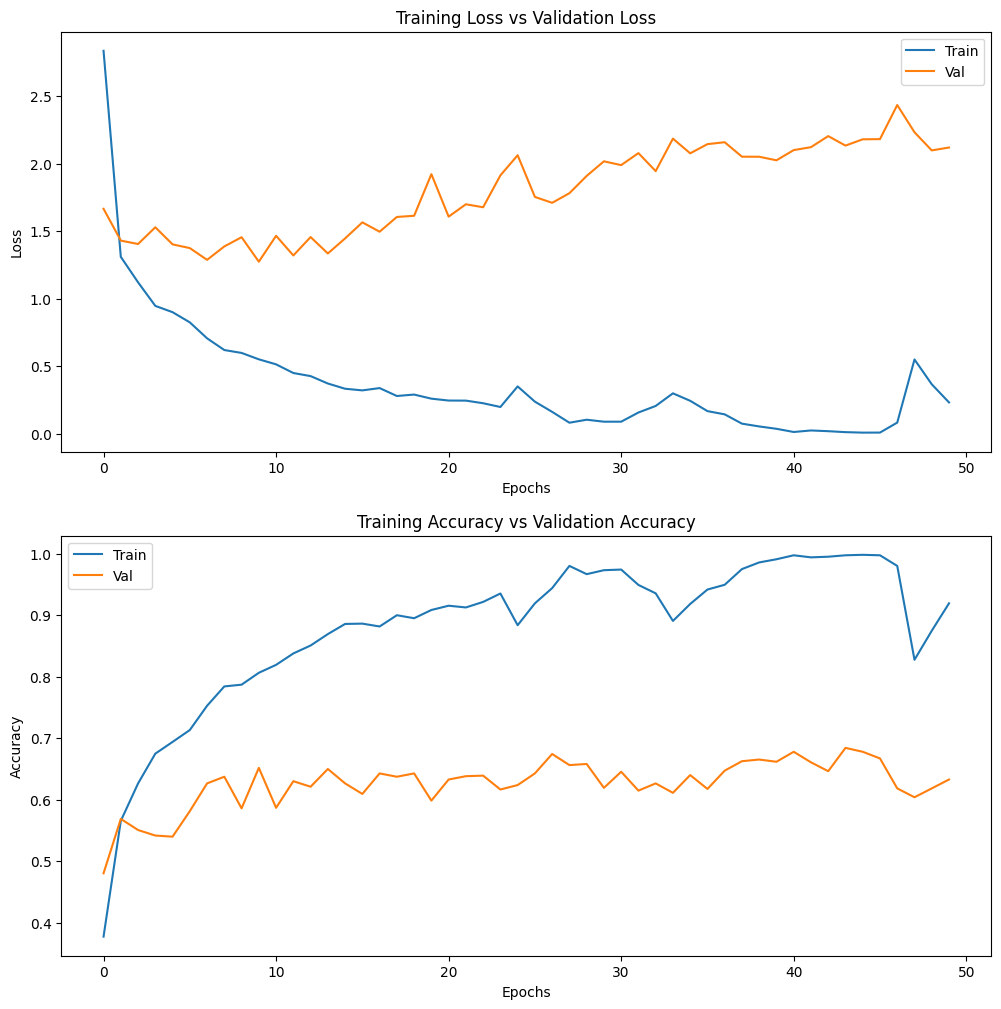

In [39]:
# Plot training history
tl.plot_history()

In [40]:
class TransferLearning:
        
    def __init__(self, train, val):
        self.train = train
        self.val = val
        self.model = None
        self.history = None
        self.training_time = None

    def load_model(self, model_name='ResNet50'):
        if model_name == 'ResNet50':
            self.model = ResNet50(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        elif model_name == 'DenseNet121':
            self.model = DenseNet121(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        elif model_name == 'MobileNetV3Small':
            self.model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        else:
            raise ValueError("Unsupported model. Choose from 'ResNet50', 'DenseNet121', 'MobileNetV3Small'.")
    
    def mark_layers_non_trainable(self):
        for layer in self.model.layers:
            layer.trainable = False
    
    def add_final_layer(self):
        x = GlobalAveragePooling2D()(self.model.output)
        x = Dense(1000, activation='relu')(x)
        predictions = Dense(12, activation='softmax')(x)
        self.model = Model(inputs=self.model.input, outputs=predictions)

    def compile_model(self):
        self.model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
    
    def train_model(self, epochs=50, batch_size=32):
        start_time = time.time()
        self.history = self.model.fit(self.train,
                                      batch_size=batch_size, 
                                      epochs=epochs,
                                      validation_data=self.val)
        end_time = time.time()
        self.training_time = end_time - start_time
        print(f"Training time: {self.training_time} seconds")

    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].set_title('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train', 'Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].set_title('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])

In [41]:
# Example usage
tl = TransferLearning(train=train, val=val)

In [42]:
tl.load_model('ResNet50')  # Choose 'ResNet50', 'DenseNet121', or 'MobileNetV3Small'

In [43]:
tl.mark_layers_non_trainable()

In [44]:
tl.add_final_layer()

In [45]:
tl.compile_model()

In [46]:
tl.train_model()

Epoch 1/50
122/122 [==============================] - 59s 468ms/step - loss: 1.4287 - accuracy: 0.5525 - val_loss: 1.0285 - val_accuracy: 0.6760
Epoch 2/50
122/122 [==============================] - 63s 519ms/step - loss: 0.6943 - accuracy: 0.7550 - val_loss: 0.9639 - val_accuracy: 0.6886
Epoch 3/50
122/122 [==============================] - 80s 653ms/step - loss: 0.4500 - accuracy: 0.8447 - val_loss: 0.9171 - val_accuracy: 0.7103
Epoch 4/50
122/122 [==============================] - 105s 859ms/step - loss: 0.3036 - accuracy: 0.9040 - val_loss: 1.0096 - val_accuracy: 0.6922
Epoch 5/50
122/122 [==============================] - 93s 760ms/step - loss: 0.2291 - accuracy: 0.9257 - val_loss: 0.9816 - val_accuracy: 0.7184
Epoch 6/50
122/122 [==============================] - 54s 445ms/step - loss: 0.1412 - accuracy: 0.9618 - val_loss: 0.9515 - val_accuracy: 0.7365
Epoch 7/50
122/122 [==============================] - 57s 467ms/step - loss: 0.0801 - accuracy: 0.9825 - val_loss: 0.9903 - val_a

In [47]:
tl.model.save("models/first_model.h5")

C:\Users\User\anaconda3\envs\ISB46703\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# Get class names
CLASS_NAMES = list(train.class_indices.keys())

In [49]:
# Generate predictions
predictions = tl.model.predict(test)
predictions = np.argmax(predictions, axis=1)
test_labels = test.classes

18/18 [==============================] - 6s 264ms/step


In [50]:
# Evaluate accuracy
acc = accuracy_score(test_labels, predictions)
print(f"Test Accuracy: {acc * 100:.3f}%")

Test Accuracy: 73.646%


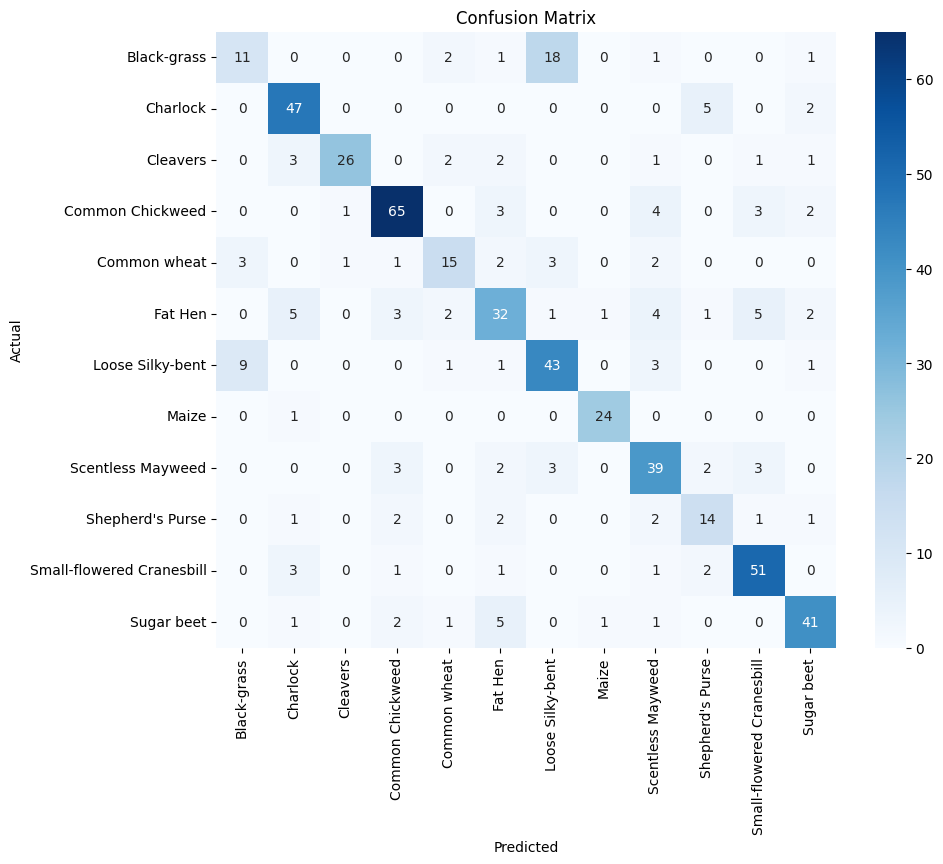

In [51]:
# Confusion matrix
cm = tf.math.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Classification report
clr = classification_report(test_labels, predictions, target_names=CLASS_NAMES)
print(clr)

                           precision    recall  f1-score   support

              Black-grass       0.48      0.32      0.39        34
                 Charlock       0.77      0.87      0.82        54
                 Cleavers       0.93      0.72      0.81        36
         Common Chickweed       0.84      0.83      0.84        78
             Common wheat       0.65      0.56      0.60        27
                  Fat Hen       0.63      0.57      0.60        56
         Loose Silky-bent       0.63      0.74      0.68        58
                    Maize       0.92      0.96      0.94        25
        Scentless Mayweed       0.67      0.75      0.71        52
         Shepherd's Purse       0.58      0.61      0.60        23
Small-flowered Cranesbill       0.80      0.86      0.83        59
               Sugar beet       0.80      0.79      0.80        52

                 accuracy                           0.74       554
                macro avg       0.73      0.72      0.72    

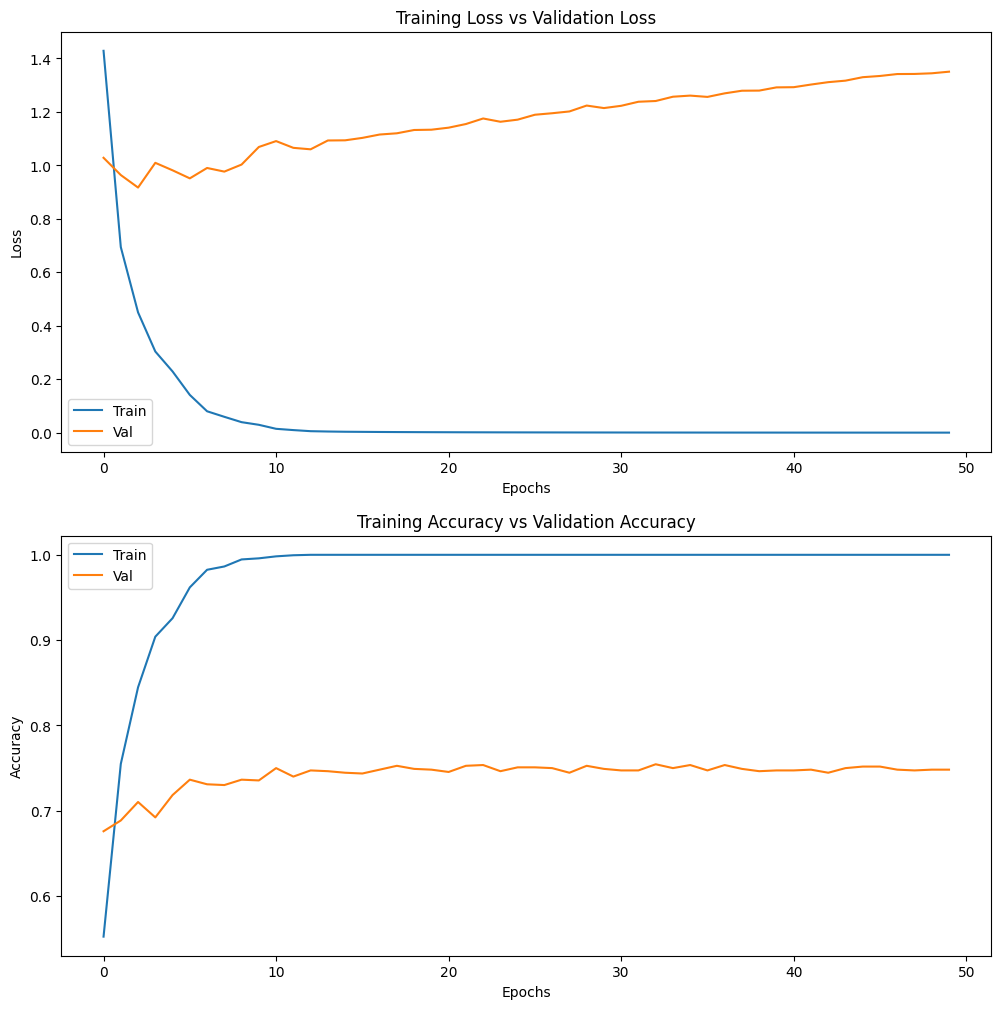

In [53]:
# Plot training history
tl.plot_history()

In [54]:
class TransferLearning:
        
    def __init__(self, train, val):
        self.train = train
        self.val = val
        self.model = None
        self.history = None
        self.training_time = None

    def load_model(self, model_name='ResNet50'):
        if model_name == 'ResNet50':
            self.model = ResNet50(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        elif model_name == 'DenseNet121':
            self.model = DenseNet121(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        elif model_name == 'MobileNetV3Small':
            self.model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
        else:
            raise ValueError("Unsupported model. Choose from 'ResNet50', 'DenseNet121', 'MobileNetV3Small'.")
    
    def mark_layers_non_trainable(self):
        for layer in self.model.layers:
            layer.trainable = False
    
    def add_final_layer(self):
        x = GlobalAveragePooling2D()(self.model.output)
        x = Dense(1000, activation='relu')(x)
        predictions = Dense(12, activation='softmax')(x)
        self.model = Model(inputs=self.model.input, outputs=predictions)

    def compile_model(self):
        self.model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
    
    def train_model(self, epochs=50, batch_size=32):
        start_time = time.time()
        self.history = self.model.fit(self.train,
                                      batch_size=batch_size, 
                                      epochs=epochs,
                                      validation_data=self.val)
        end_time = time.time()
        self.training_time = end_time - start_time
        print(f"Training time: {self.training_time} seconds")

    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].set_title('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train', 'Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].set_title('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])

In [55]:
tl = TransferLearning(train=train, val=val)

In [56]:
tl.load_model('MobileNetV3Small')  # Choose 'ResNet50', 'DenseNet121', or 'MobileNetV3Small'

In [57]:
tl.mark_layers_non_trainable()



In [58]:
tl.add_final_layer()

In [59]:
tl.compile_model()

In [60]:
tl.train_model()

Epoch 1/50
122/122 [==============================] - 36s 279ms/step - loss: 1.9500 - accuracy: 0.3474 - val_loss: 1.7410 - val_accuracy: 0.4242
Epoch 2/50
122/122 [==============================] - 32s 262ms/step - loss: 1.5182 - accuracy: 0.4888 - val_loss: 1.6032 - val_accuracy: 0.4612
Epoch 3/50
122/122 [==============================] - 32s 259ms/step - loss: 1.3086 - accuracy: 0.5435 - val_loss: 1.4869 - val_accuracy: 0.5090
Epoch 4/50
122/122 [==============================] - 32s 262ms/step - loss: 1.1837 - accuracy: 0.5927 - val_loss: 1.4609 - val_accuracy: 0.5000
Epoch 5/50
122/122 [==============================] - 32s 265ms/step - loss: 1.1363 - accuracy: 0.6100 - val_loss: 1.4796 - val_accuracy: 0.4982
Epoch 6/50
122/122 [==============================] - 36s 295ms/step - loss: 1.0685 - accuracy: 0.6363 - val_loss: 1.3946 - val_accuracy: 0.5289
Epoch 7/50
122/122 [==============================] - 32s 262ms/step - loss: 0.9554 - accuracy: 0.6789 - val_loss: 1.4188 - val_ac

In [61]:
# Save the trained model
tl.model.save("models/first_model.h5")

C:\Users\User\anaconda3\envs\ISB46703\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Get class names
CLASS_NAMES = list(train.class_indices.keys())

In [63]:
# Generate predictions
predictions = tl.model.predict(test)
predictions = np.argmax(predictions, axis=1)
test_labels = test.classes

18/18 [==============================] - 4s 170ms/step


In [64]:
# Evaluate accuracy
acc = accuracy_score(test_labels, predictions)
print(f"Test Accuracy: {acc * 100:.3f}%")

Test Accuracy: 59.567%


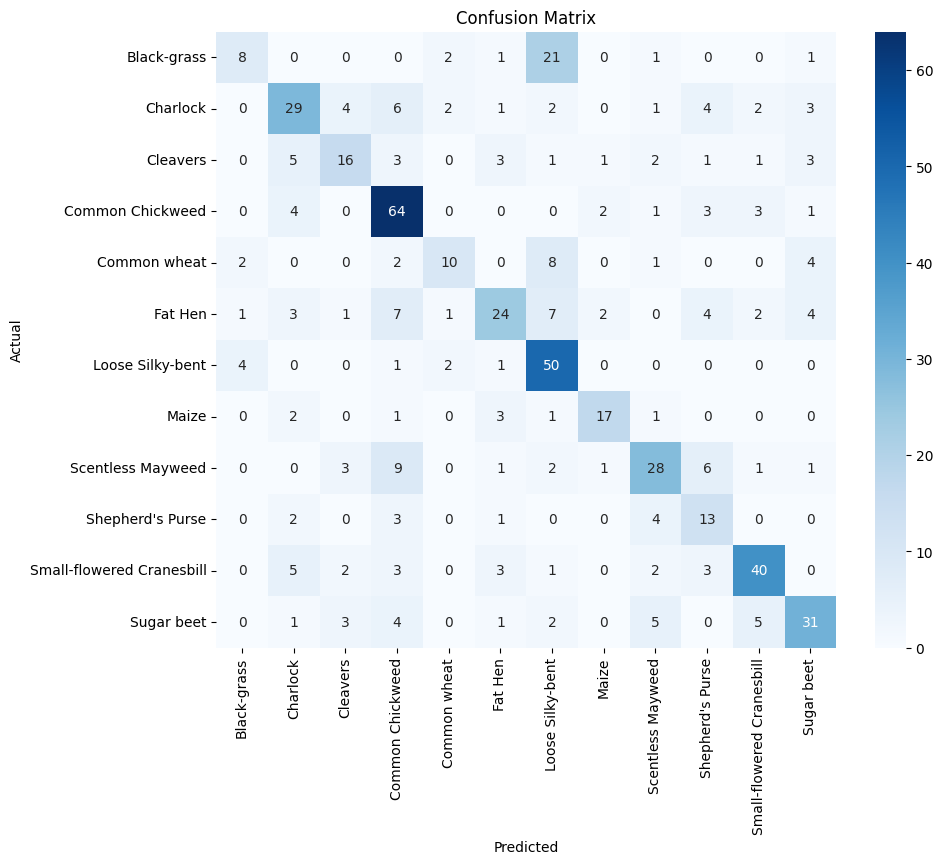

In [65]:
# Confusion matrix
cm = tf.math.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
# Classification report
clr = classification_report(test_labels, predictions, target_names=CLASS_NAMES)
print(clr)

                           precision    recall  f1-score   support

              Black-grass       0.53      0.24      0.33        34
                 Charlock       0.57      0.54      0.55        54
                 Cleavers       0.55      0.44      0.49        36
         Common Chickweed       0.62      0.82      0.71        78
             Common wheat       0.59      0.37      0.45        27
                  Fat Hen       0.62      0.43      0.51        56
         Loose Silky-bent       0.53      0.86      0.65        58
                    Maize       0.74      0.68      0.71        25
        Scentless Mayweed       0.61      0.54      0.57        52
         Shepherd's Purse       0.38      0.57      0.46        23
Small-flowered Cranesbill       0.74      0.68      0.71        59
               Sugar beet       0.65      0.60      0.62        52

                 accuracy                           0.60       554
                macro avg       0.59      0.56      0.56    

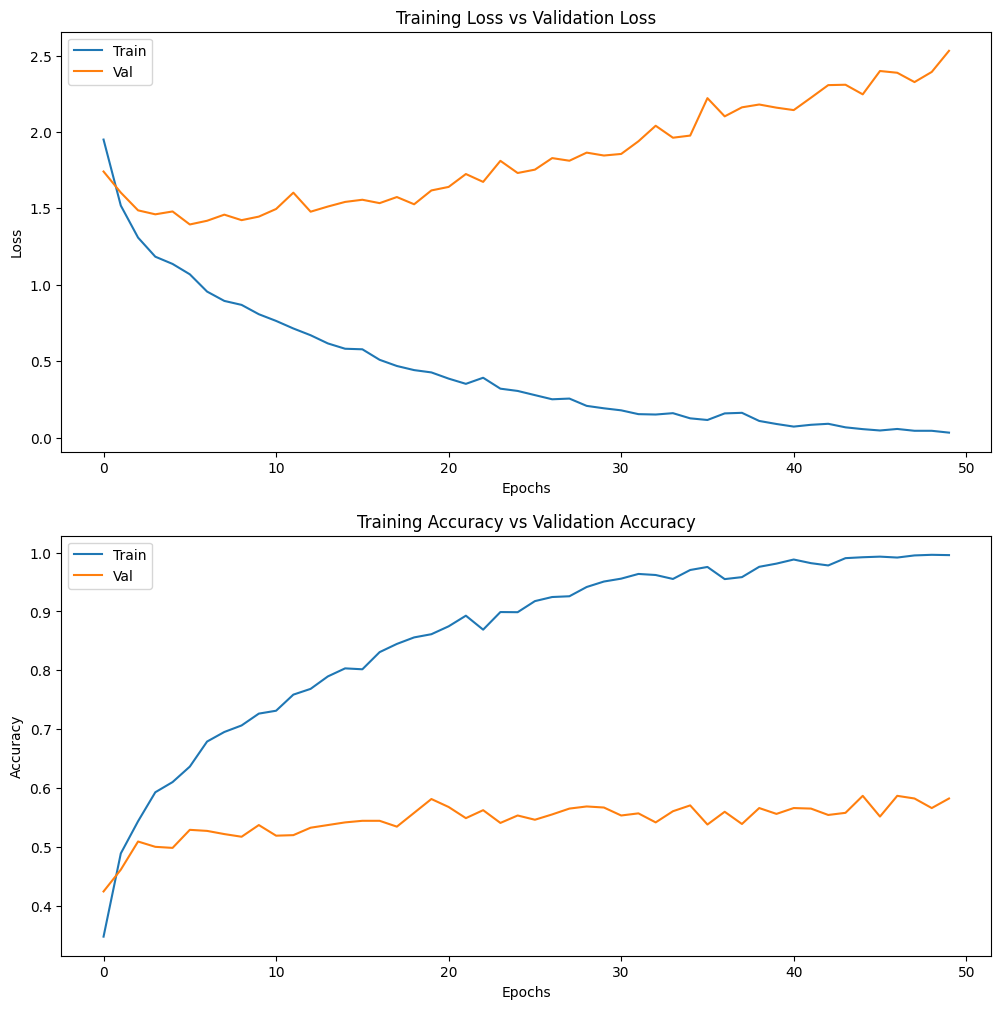

In [67]:
# Plot training history
tl.plot_history()

In [3]:
#Dense121:
#Test Accuracy = 61.552%
#Training time = 3926.5407197475433 seconds

#ResNet50:
#Test Accuracy = 73.646%
#Training time = 4087.5939943790436 seconds

#MobileNetV3
#Test Accuracy = 59.567%
#Training time = 1888.4038543701172 seconds

#In conclusion, the ResNet50 model is the best suited for this classification task based on its superior accuracy. 
#However, if computational efficiency and faster training time are more critical (e.g., in a resource-constrained environment), 
#the MobileNetV3 model might be a better choice. It provides reasonable accuracy.